<a href="https://colab.research.google.com/github/pooja-parsana/hotel_booking_analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:

file_path='/content/drive/MyDrive/AlmaBetter/Cohort Rimo/Module 1/week 4/Hotel Bookings.csv'
dataframe=pd.read_csv(file_path)

In [ ]:
df=dataframe.copy()

In [ ]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:

df.shape

(119390, 32)

# **Checking null values**

In [ ]:
# df.isnull().sum().sort_values()
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [ ]:
#remove those column which have many number of missing value 
df=df.drop(columns=['agent','company'])

In [ ]:

df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [ ]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [ ]:
#remove those row which have NaN values
df=df.dropna(axis=0)

In [ ]:
#Now check our data is ready to processed
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## **HOTEL**

In [ ]:
df['hotel'].value_counts()

City Hotel      79302
Resort Hotel    39596
Name: hotel, dtype: int64

In [ ]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

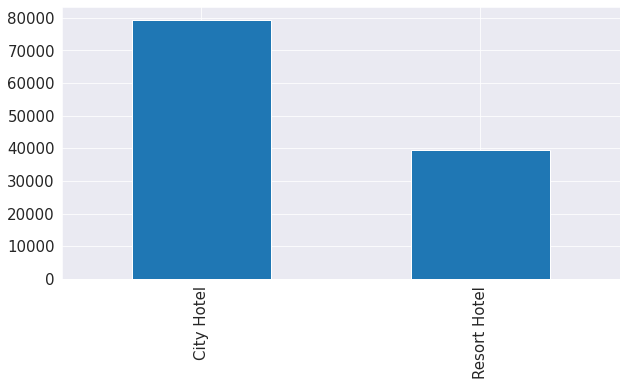

In [ ]:
df['hotel'].value_counts().plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7f4053d77050>,
 [Text(-0.9520945954321745, -0.5509227544300964, 'City Hotel'),
  Text(1.0386485932920646, 0.6010067384417713, 'Resort Hotel')],
 [Text(-0.519324324781186, -0.30050332059823437, '66.7%'),
  Text(0.6058783460870376, 0.35058726409103325, '33.3%')])

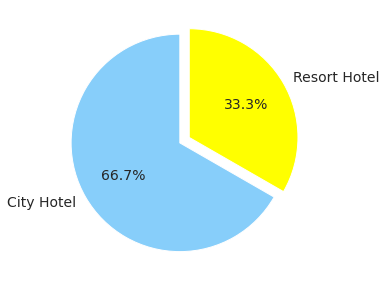

In [ ]:
# df['hotel'].value_counts().plot(kind='pie')
explode=(0,0.1)
sizes=df['hotel'].value_counts().tolist()
labels=df['hotel'].value_counts().index.tolist()

colors = ['lightskyblue','yellow']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

*   It seems that a huge proportion of hotels was city hotel. 





**Let's check about cancled booking**

In [ ]:
# selecting only those rows which have do not have booking cancellations.
df= df[df.is_canceled == 0]
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df['is_canceled'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([0]), <a list of 1 Text major ticklabel objects>)

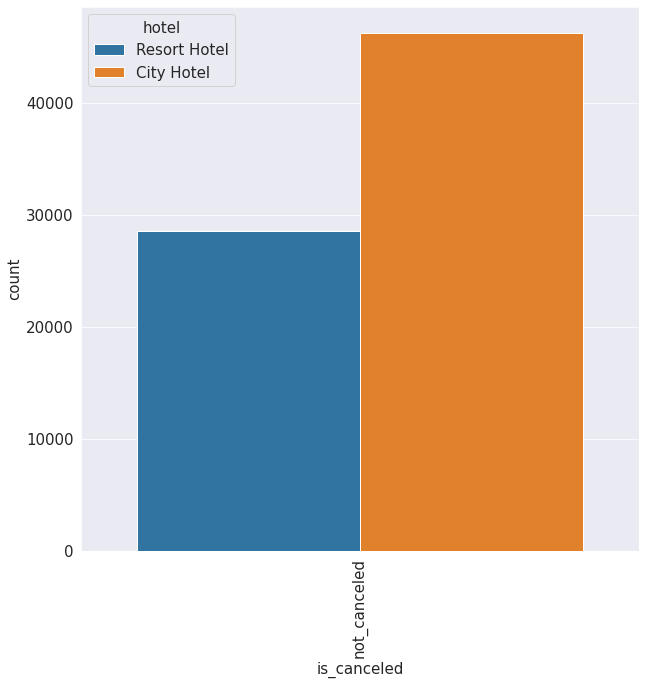

In [ ]:
df['is_canceled']=df.is_canceled.replace([1,0],['canceled','not_canceled'])
canceled_data=df['is_canceled']
plt.figure(figsize=(10,10))
sns.countplot(x=canceled_data,data=df,hue= 'hotel')
plt.xticks(rotation=90)






* It seems that majority of bookings were not canceled



**Let's look into cancellation rate among different type of hotel.**

In [ ]:
#cancelation rate among differnt type of hotel

# canceled_data=df[df['is_canceled']==1].groupby(['hotel']).size().reset_index(name='count')
# # sns.barplot(data=canceled_data,x='hotel',y='count').set_title('cancelatin rate of city and resort hotel')
# # sns.countplot(x=df['hotel'],data=canceled_data)
# sns.barplot(data=canceled_data,x=df['hotel'],y='count')


lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = df[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')



# sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Graph showing cancellation rates in city and resort hotel')

## **ARRIVAL PERIOD**

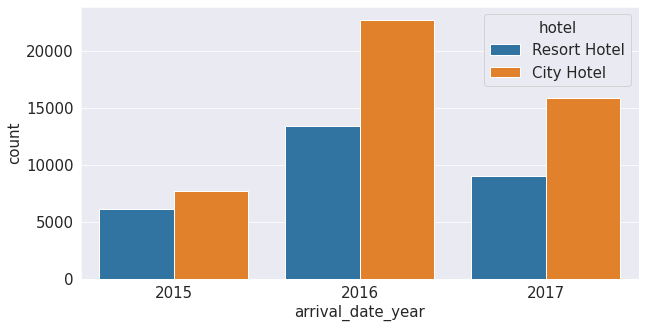

In [ ]:
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel')

In [ ]:
df.arrival_date_month.value_counts(normalize=True)

August       0.115299
July         0.105586
May          0.095016
October      0.091872
March        0.088180
April        0.087404
June         0.085531
September    0.085183
February     0.071135
November     0.061971
December     0.058399
January      0.054425
Name: arrival_date_month, dtype: float64

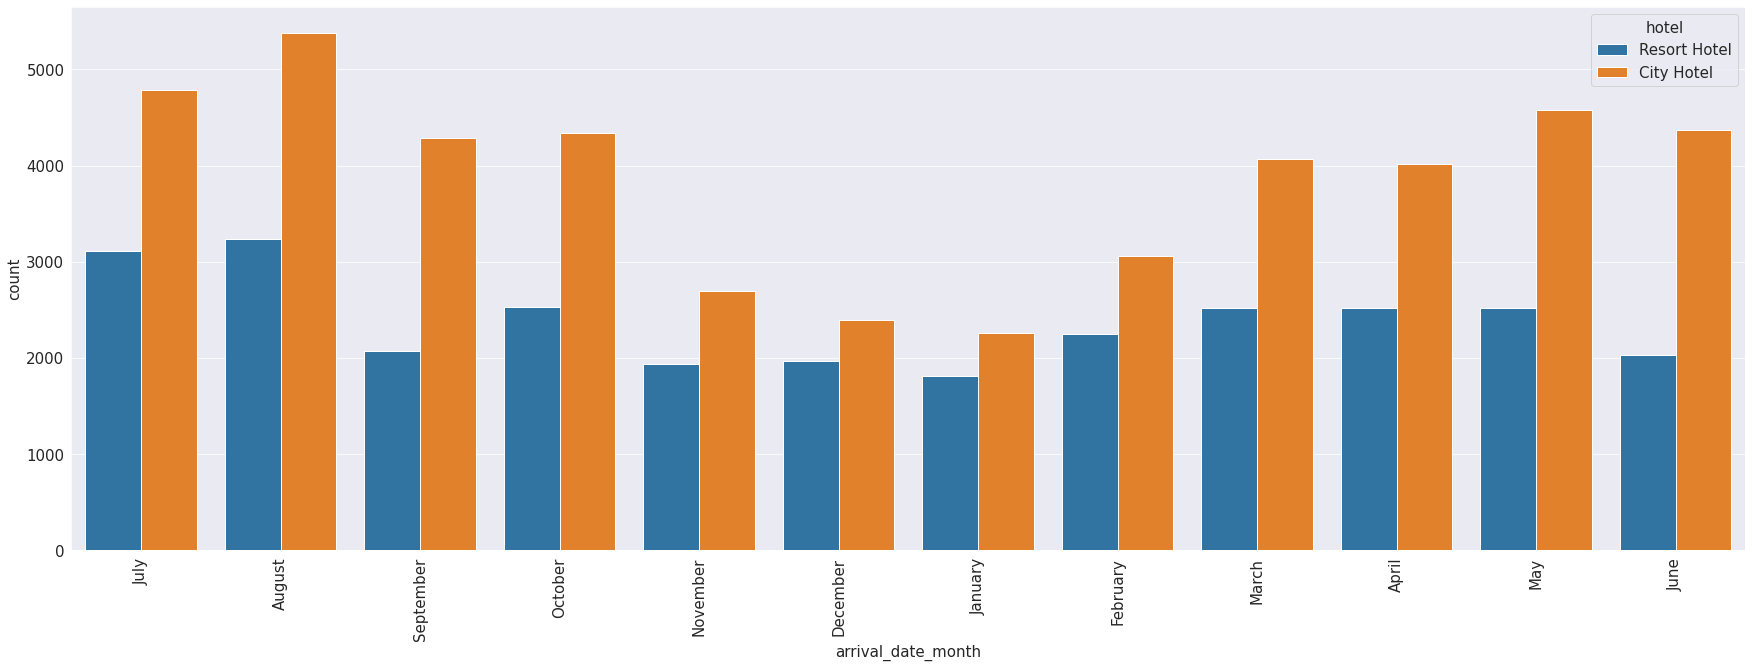

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['arrival_date_month'],data=df,hue='hotel')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['arrival_date_week_number'].value_counts()

33    2067
34    1994
32    1876
30    1840
28    1797
21    1789
29    1742
31    1738
42    1675
27    1672
35    1667
15    1631
17    1621
38    1617
41    1606
18    1600
39    1586
20    1565
23    1547
19    1536
22    1530
26    1529
13    1526
44    1508
24    1473
11    1442
43    1442
12    1435
16    1425
14    1421
25    1418
7     1411
8     1411
10    1405
40    1393
9     1382
36    1348
37    1348
47    1296
45    1171
53    1165
48    1121
49    1109
6     1101
46     975
3      965
4      963
5      951
50     900
52     836
2      819
1      691
51     669
Name: arrival_date_week_number, dtype: int64

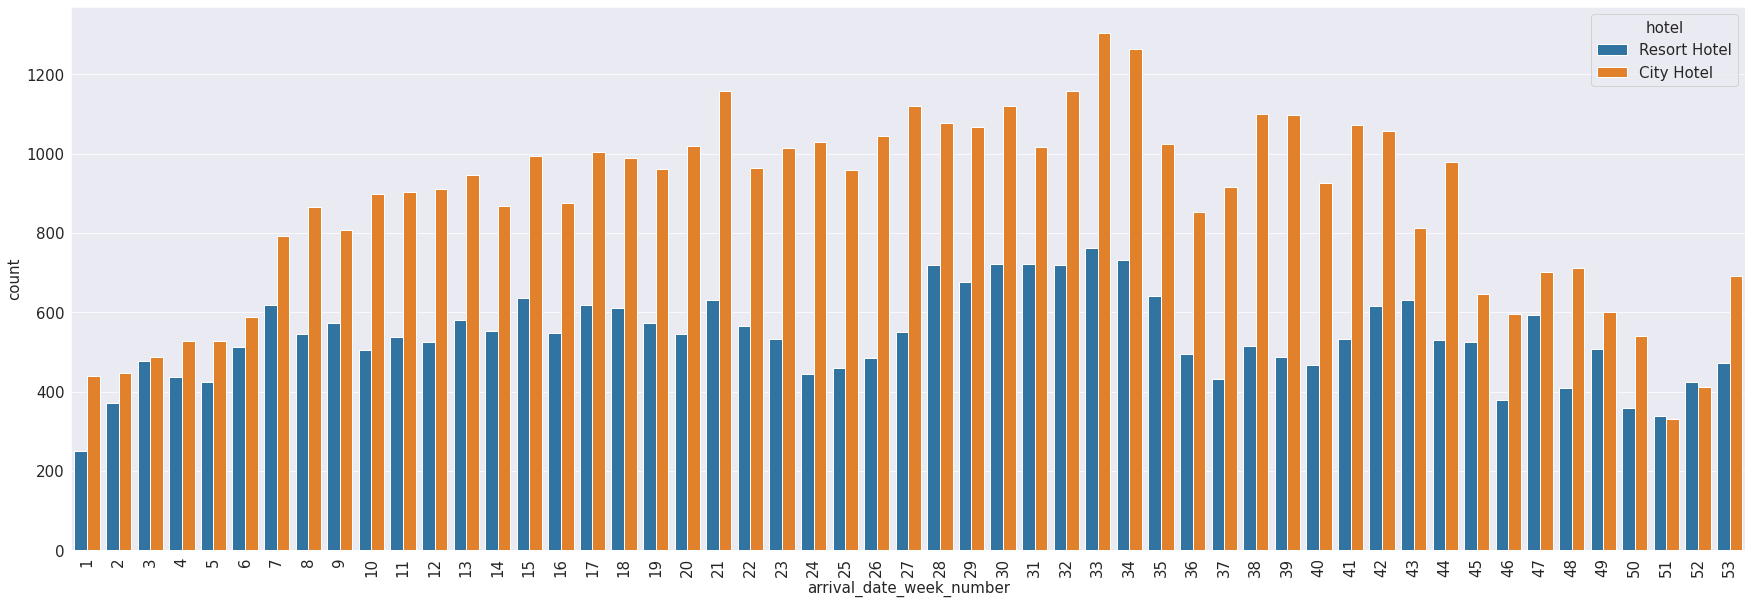

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['arrival_date_week_number'],data=df,hue='hotel')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['stays_in_weekend_nights'].value_counts()

0     32219
2     20784
1     19528
4      1252
3       810
6        66
5        35
8        26
10        5
7         5
12        4
9         4
13        3
16        2
14        2
Name: stays_in_weekend_nights, dtype: int64

## **Over view of arrival period**

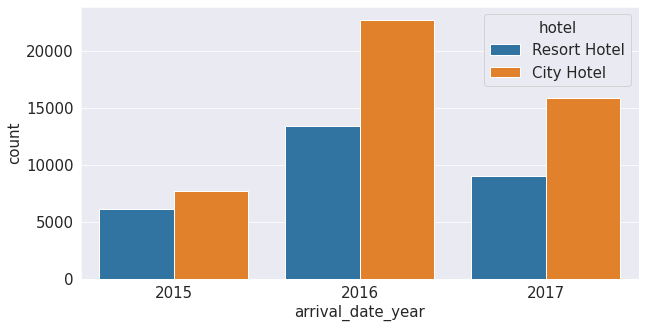

In [ ]:
lst=['hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month']
period_arrival=df[lst]
sns.countplot(data=period_arrival,x='arrival_date_year',hue="hotel")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

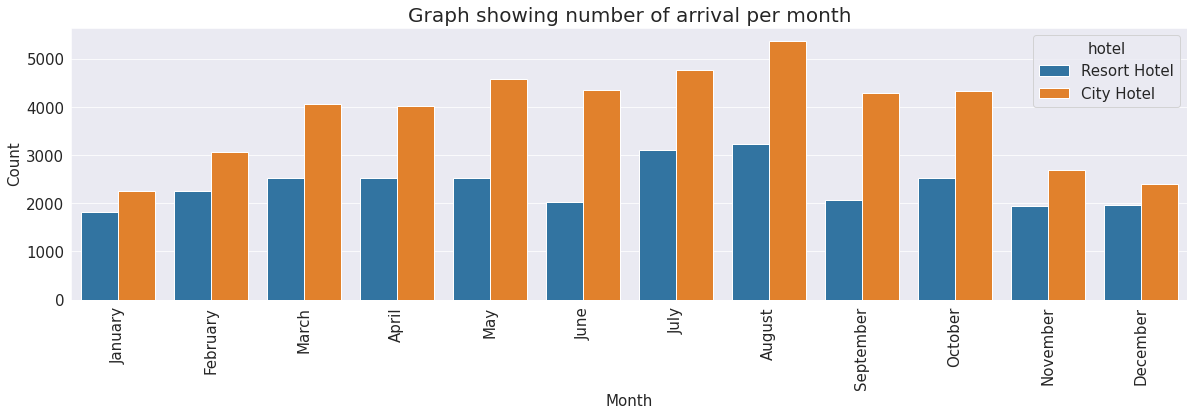

In [ ]:
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)



*   I can see that in year of 2016 and 2017 hotel booking is at its heighest. 
*   And the booking around the month f August being the heighest.
*   That's why it seems that the summer period is a peak period for hotel   bookings.


Text(0.5, 1.0, 'Number of stays on weekend nights')

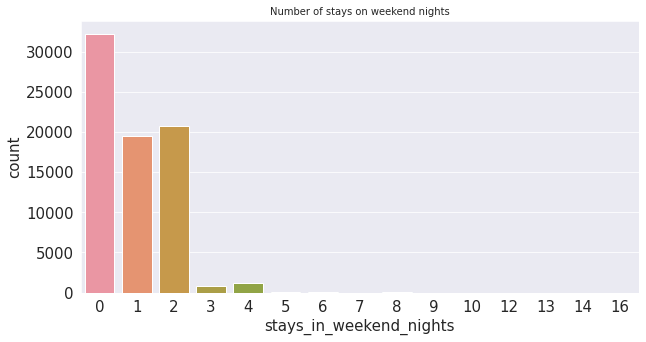

In [ ]:

sns.countplot(data = df, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

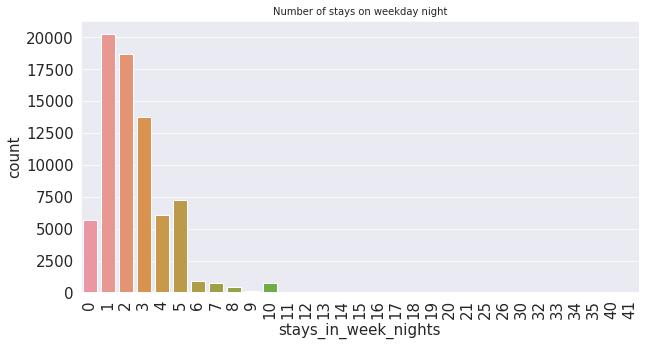

In [ ]:
sns.countplot(data=df,x='stays_in_week_nights').set_title('Number of stays on weekday night',fontsize=10)
plt.xticks(rotation=90)


*  It shows that the majority of booking are on weekdays nights




In [ ]:
# df.groupby(['arrival_date_month', 'arrival_date_year']).count()

## **VISITORS**

In [ ]:
# For adulte,  Using groupby to group according to hotel types only.
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,46226.0,1.828127,0.536065,0.0,2.0,2.0,2.0,4.0
Resort Hotel,28519.0,1.839405,0.462435,0.0,2.0,2.0,2.0,4.0


Text(0.5, 1.0, 'Number of adults')

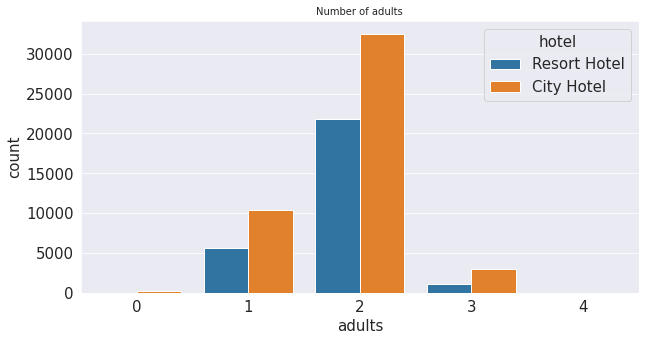

In [ ]:
sns.countplot(data=df,x='adults',hue='hotel').set_title('Number of adults',fontsize=10)

In [ ]:
#for children

df['children'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,46226.0,0.099900,0.386149,0.0,0.0,0.0,0.0,3.0
Resort Hotel,28519.0,0.107367,0.400279,0.0,0.0,0.0,0.0,3.0


Text(0.5, 1.0, 'number of children')

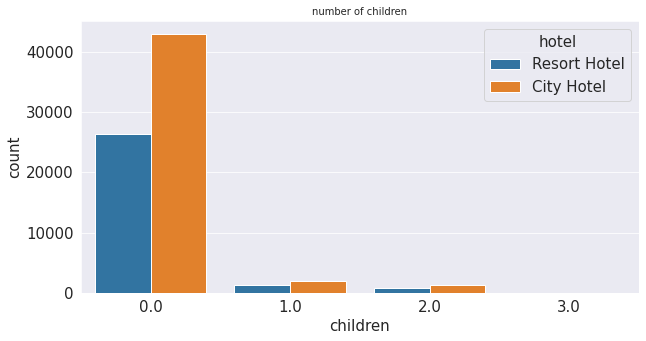

In [ ]:
sns.countplot(data=df,x='children',hue='hotel').set_title('number of children',fontsize=10)

In [ ]:
# for babies
df['babies'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,46226.0,0.007096,0.103969,0.0,0.0,0.0,0.0,10.0
Resort Hotel,28519.0,0.015709,0.126029,0.0,0.0,0.0,0.0,2.0


Text(0.5, 1.0, 'Number of babies')

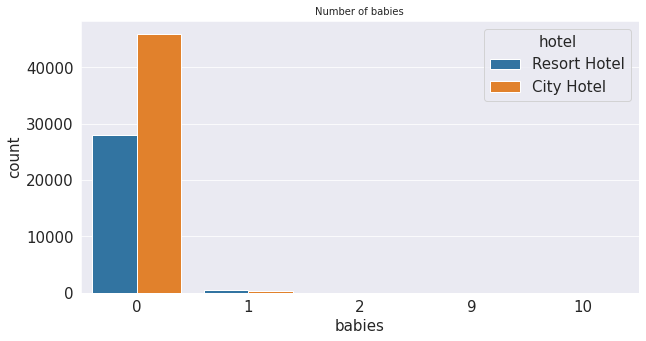

In [ ]:
sns.countplot(data=df,x='babies',hue='hotel').set_title('Number of babies',fontsize=10)



*   It seems that majority of visitors are adults(2 members).


In [ ]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'JAM', 'HRV', 'IRN', 'CAF', 'CYP', 'NZL', 'IDN',
       'KAZ', 'THA', 'COL', 'DOM', 'MKD', 'MYS', 'NGA', 'VEN', 'GIB',
       'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM', 'SUR',
       'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'PHL', 'SGP', 'BDI', 'URY',
       'SAU', 'KWT', 'LBN', 'AND', 'VNM', 'AZE', 'PLW', 'ARE', 'QAT',
       'EGY', 'PER', 'SVK', 'MDV', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'PAK', 'MAC', 'TGO', 'TWN', 'HKG', 'DJI',
       'GEO', 'TUN', 'STP', 'SEN', 'KNA', 'ETH', 'IRQ', 'RWA', 'LIE',
       'MMR', 'PAN', 

In [ ]:
# by above graph we can see that most of booking are not canceleddf.country.value_counts()
df.country.value_counts()

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
       ...  
BHR        1
SDN        1
ASM        1
MDG        1
DJI        1
Name: country, Length: 165, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]), <a list of 10 Text major ticklabel objects>)

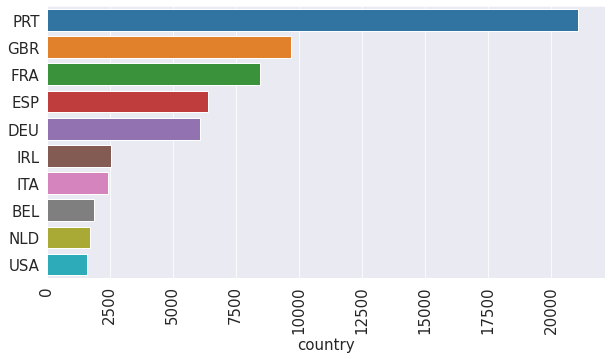

In [ ]:
#from which country most gaust are coming
# sns.barplot (y= list(df.country.value_counts().head (15)), x= list(df.country.value_counts().head(15).index))
# plt.xticks(rotation=90)
y=df['country'].value_counts().head(10)
x=df['country'].value_counts().head(10).index
sns.barplot(y,x)
plt.xticks(rotation=90)

# country_name = [pc.countries.get(alpha_3=name).name for name in x]

# plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))



*   We have a huge number of visitors from Portugal.



In [ ]:
df['meal'].value_counts()

BB           57411
HB            9453
SC            6682
Undefined      879
FB             320
Name: meal, dtype: int64

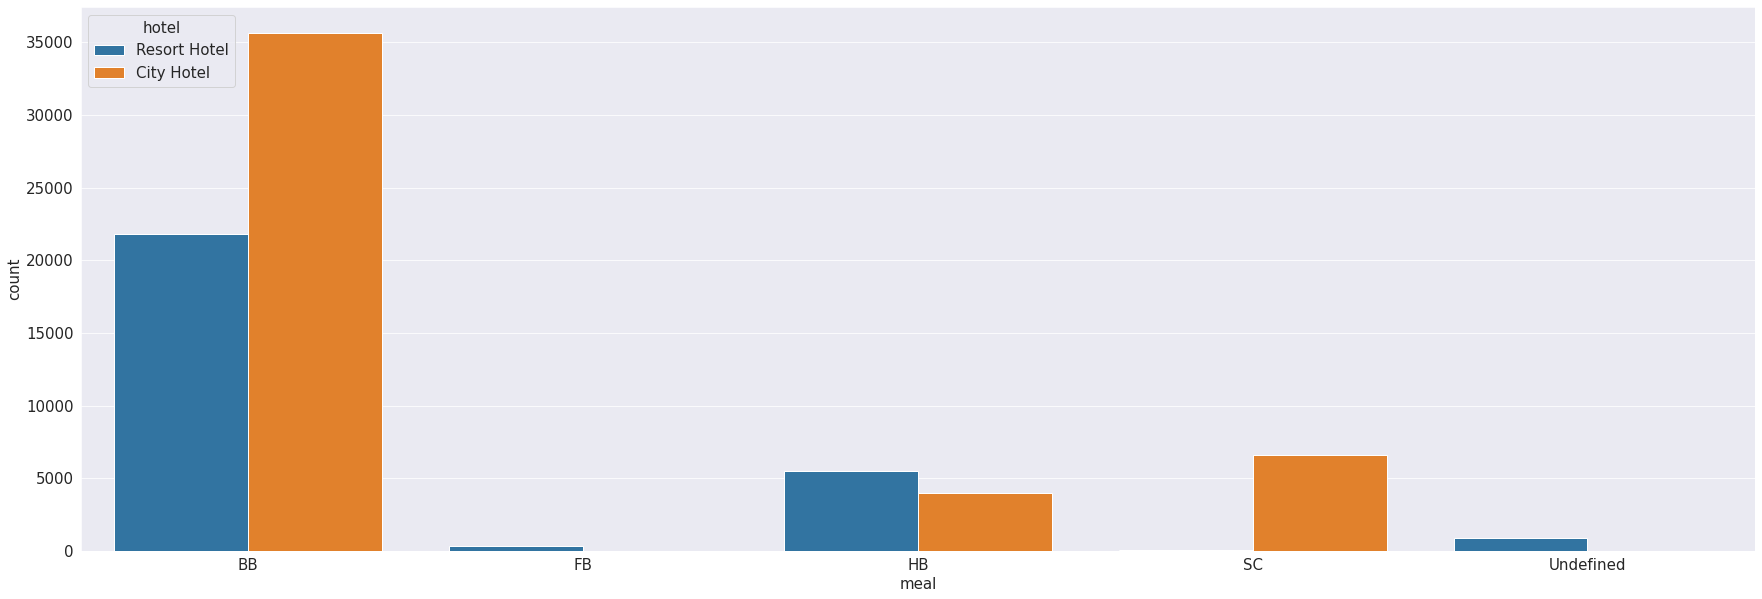

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['meal'],data=df,hue='hotel')
plt.show()




*   We can see that most preferd meal is BB(brakefast with bread)



In [ ]:
df['market_segment'].value_counts()

Online TA        35664
Offline TA/TO    15882
Direct           10528
Groups            7709
Corporate         4133
Complementary      644
Aviation           185
Name: market_segment, dtype: int64

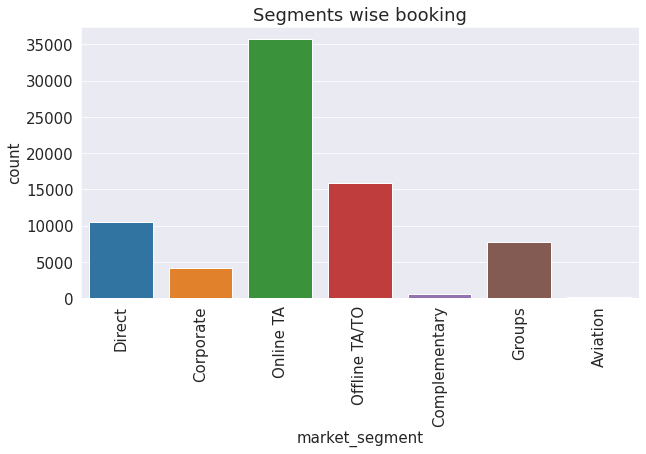

In [ ]:
# plt.figure(figsize=(10,10))
# sns.countplot(df['market_segment'])
# plt.show()
plt.title("Segments wise booking")
ax = sns.countplot(x = "market_segment", data = df)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['distribution_channel'].value_counts()

TA/TO        57611
Direct       11940
Corporate     5037
GDS            156
Undefined        1
Name: distribution_channel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


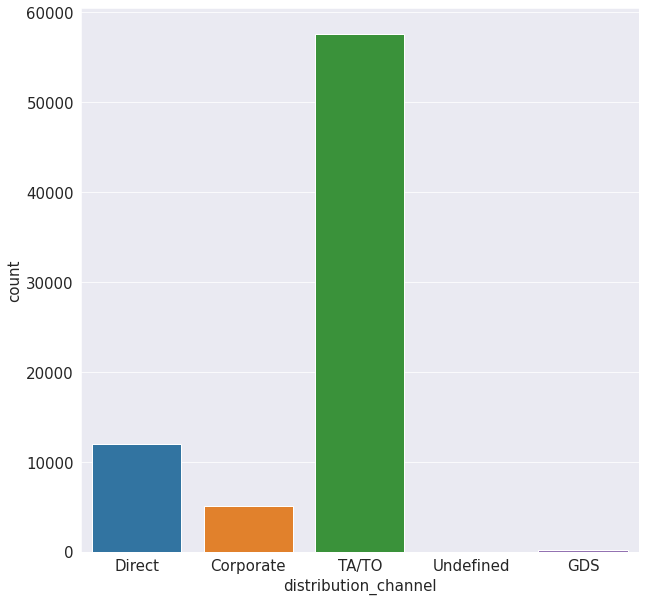

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['distribution_channel'])
plt.show()



*   Majority of the distribution channels and market segments involve travel agencies (online or offline).



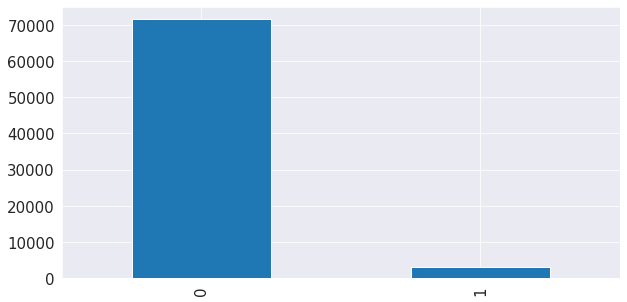

In [ ]:
df['is_repeated_guest'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


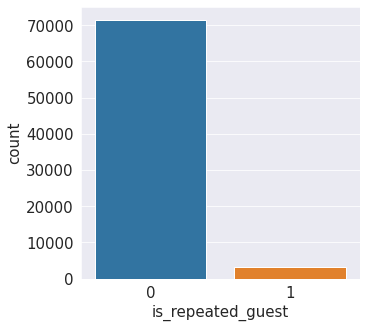

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(df['is_repeated_guest'])
plt.show()



*   Here we can say that low number of repeated gaust are there.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


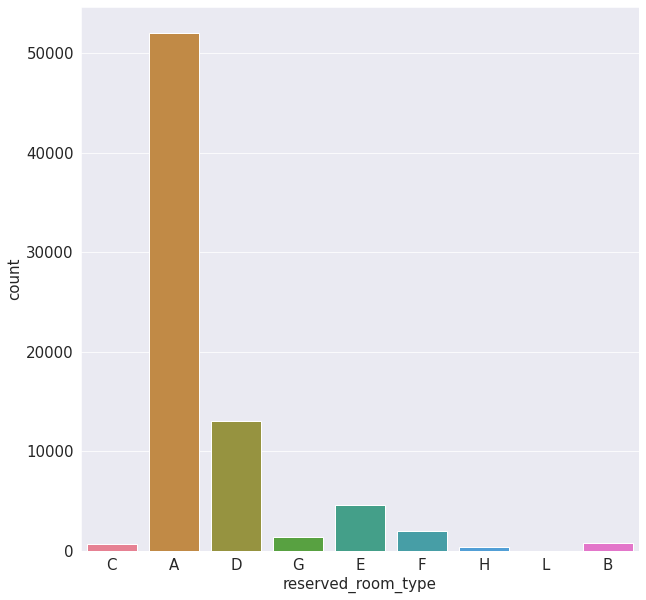

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['reserved_room_type'], palette='husl')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


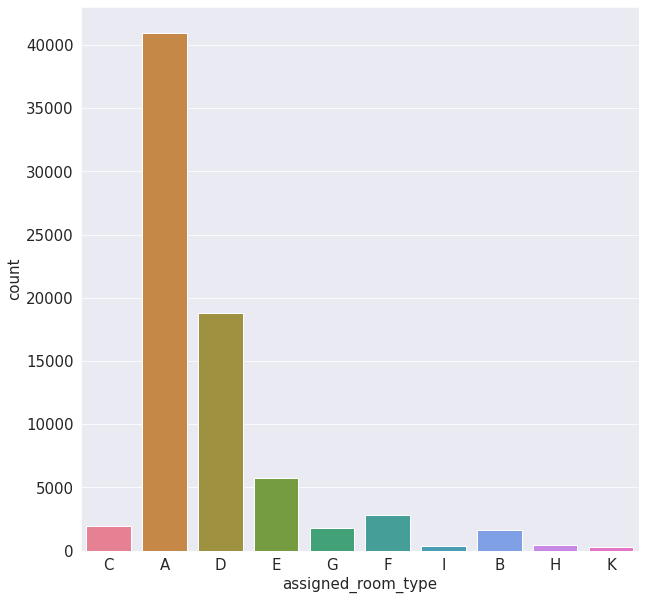

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['assigned_room_type'], palette='husl')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


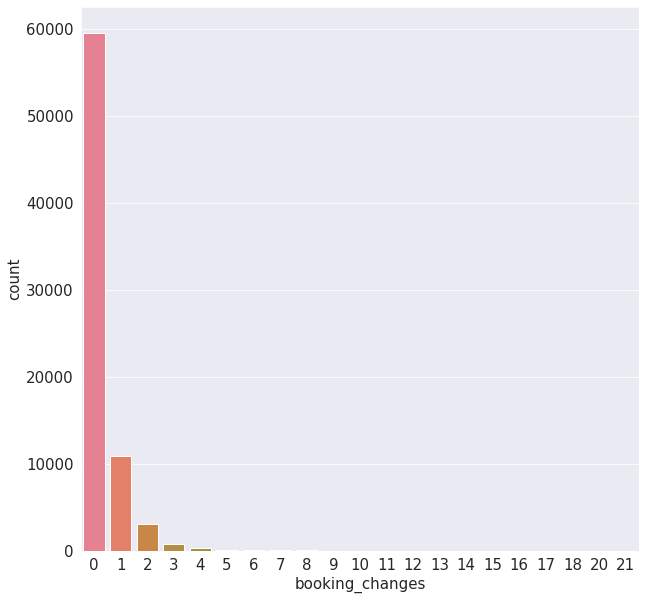

In [ ]:

plt.figure(figsize=(10,10))
sns.countplot(df['booking_changes'], palette='husl')
plt.show()

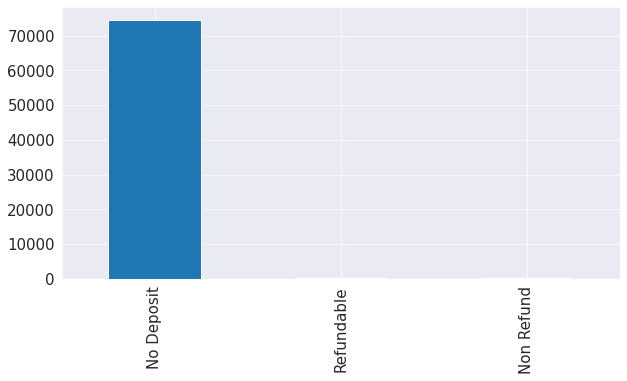

In [ ]:

df['deposit_type'].value_counts().plot(kind='bar')




*   It seems that majority of booking does not required deposite



In [ ]:
df['customer_type'].value_counts()

Transient          52714
Transient-Party    18705
Contract            2814
Group                512
Name: customer_type, dtype: int64

In [ ]:
# a = df.groupby("customer_type")['is_canceled'].describe()

# sns.barplot(x=a.index, y=a["mean"] * 100)

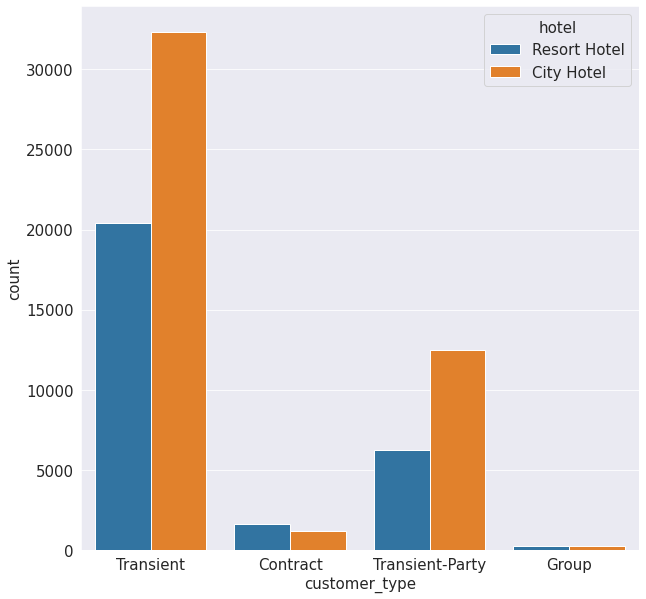

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['customer_type'],data=df,hue='hotel')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


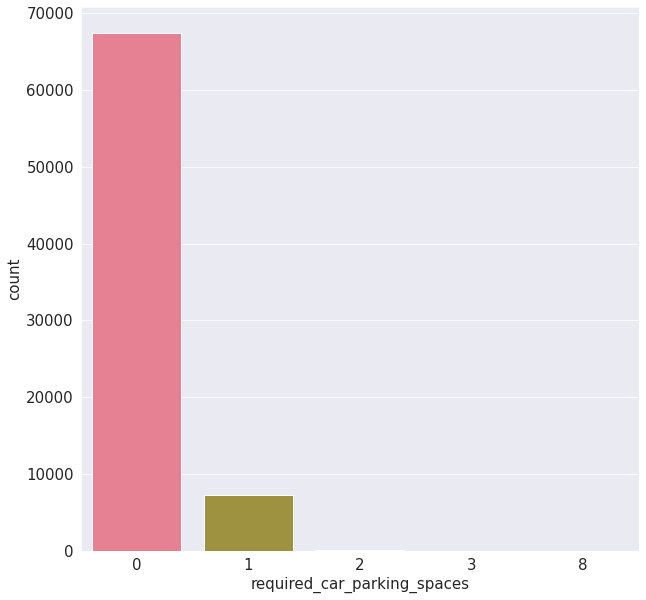

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['required_car_parking_spaces'], palette='husl')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


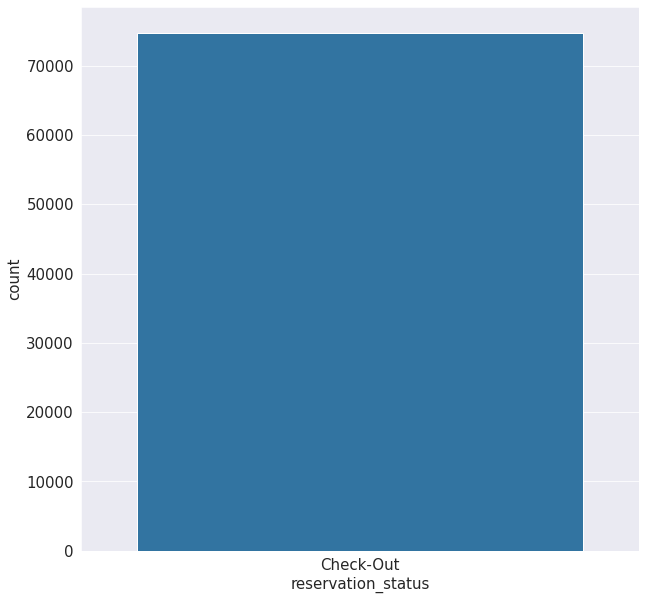

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['reservation_status'])
plt.show()



*   It seems that price of resort hotels is much higher then the city hotels



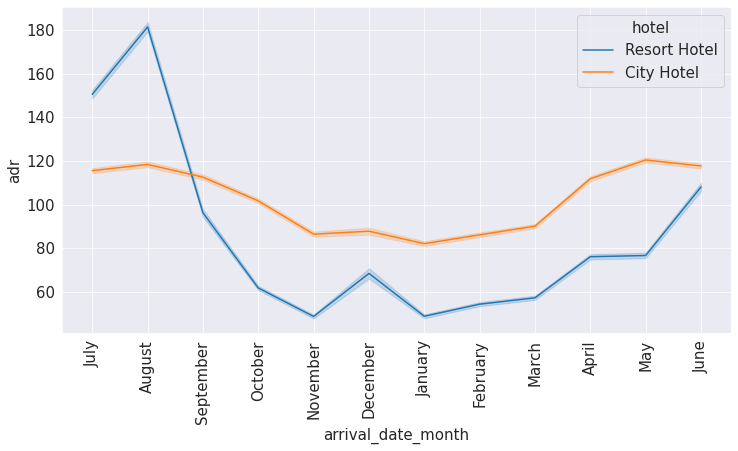

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.xticks(rotation=90)
plt.show()

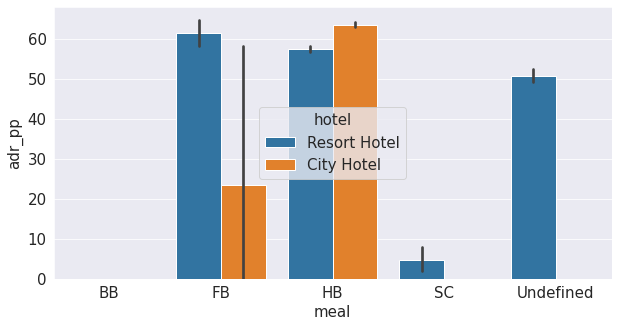

In [ ]:
# plotting variation in adr with meal type
sns.barplot(data = df, x = 'meal', y = 'adr_pp', hue = 'hotel')

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

# **Best time of the year to book a hotel room?**

In [ ]:
#best time of year to book a hotel
best_time_of_year=df.arrival_date_year.unique()
best_time_of_year

array([2015, 2016, 2017])

In [ ]:
a=df.groupby('hotel').arrival_date_year.unique()
a

hotel
City Hotel      [2015, 2016, 2017]
Resort Hotel    [2015, 2016, 2017]
Name: arrival_date_year, dtype: object

## **Best daily rate**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

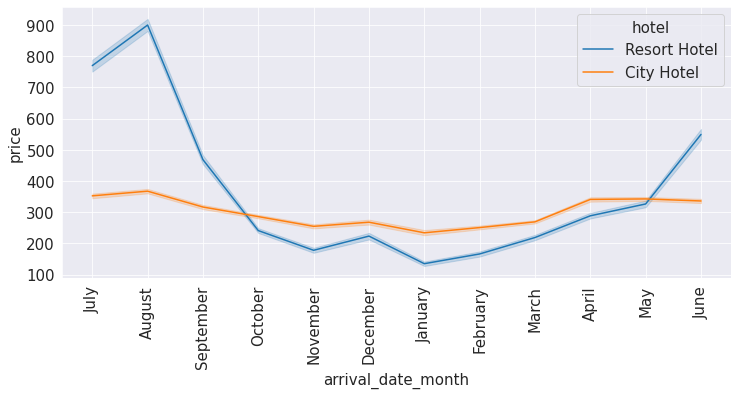

In [ ]:
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
df['adr_pp'] = df['adr'] / (df['adults'] + df['children']) 
actual_guests = df.loc[df["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.xticks(rotation=90)

# **predict whether or not a hotel was likely to receive a disproportionately high number of special requests?**

In [ ]:
df.total_of_special_requests.max()

0         0
1         0
2         0
3         0
4         1
         ..
119385    0
119386    2
119387    4
119388    0
119389    2
Name: total_of_special_requests, Length: 74745, dtype: int64